#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [1]:
#ENTER YOUR CODE HERE
from google.colab import files
uploaded = files.upload()

Saving new_dataset.csv to new_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('new_dataset.csv')
df.head()

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
#ENTER YOUR CODE HERE

In [3]:

import re
def clean_text(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  return text

df['text'] = df['text'].apply(clean_text)
df.head()

,sentiment,text
0,Negative,oh no where did u order from thats horrible
1,Negative,A great hard training weekend is over a coupl...
2,Negative,Right off to work Only 5 hours to go until Im...
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
#ENTER YOUR CODE HERE

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  tokens= word_tokenize(text.lower())
  filtered_tokens = [word for word in tokens if word not in stop_words]
  return ' '.join(filtered_tokens)

df['text']= df['text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,sentiment,text
0,Negative,oh u order thats horrible
1,Negative,great hard training weekend couple days rest l...
2,Negative,right work 5 hours go im free xd
3,Negative,craving japanese food
4,Negative,jean michel jarre concert tomorrow got ta work...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
  tokens = word_tokenize(text)
  stemmed = [stemmer.stem(word) for word in tokens]
  return ' '.join(stemmed)

df['text'] = df['text'].apply(stem_text)
df.head()

,sentiment,text
0,Negative,oh u order that horribl
1,Negative,great hard train weekend coupl day rest let lo...
2,Negative,right work 5 hour go im free xd
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [6]:
#ENTER YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

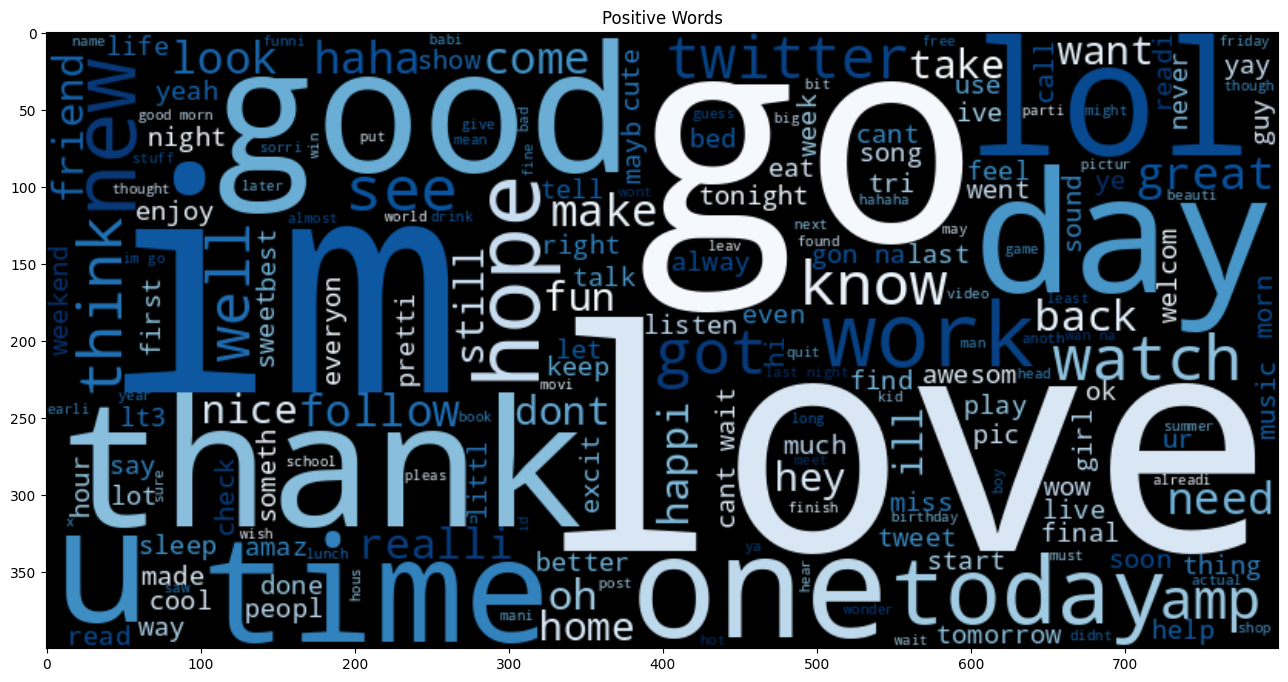

In [7]:
positive_text = ' '.join(df.loc[df['sentiment'] == 'Positive', 'text'])

wc = WordCloud(width=800, height=400, background_color='black', colormap='Blues')
pos = wc.generate(positive_text)

plt.figure(figsize=(16, 8))
plt.imshow(pos, interpolation='bilinear')
plt.title("Positive Words")

plt.show()


In [ ]:
#ENTER YOUR CODE HERE

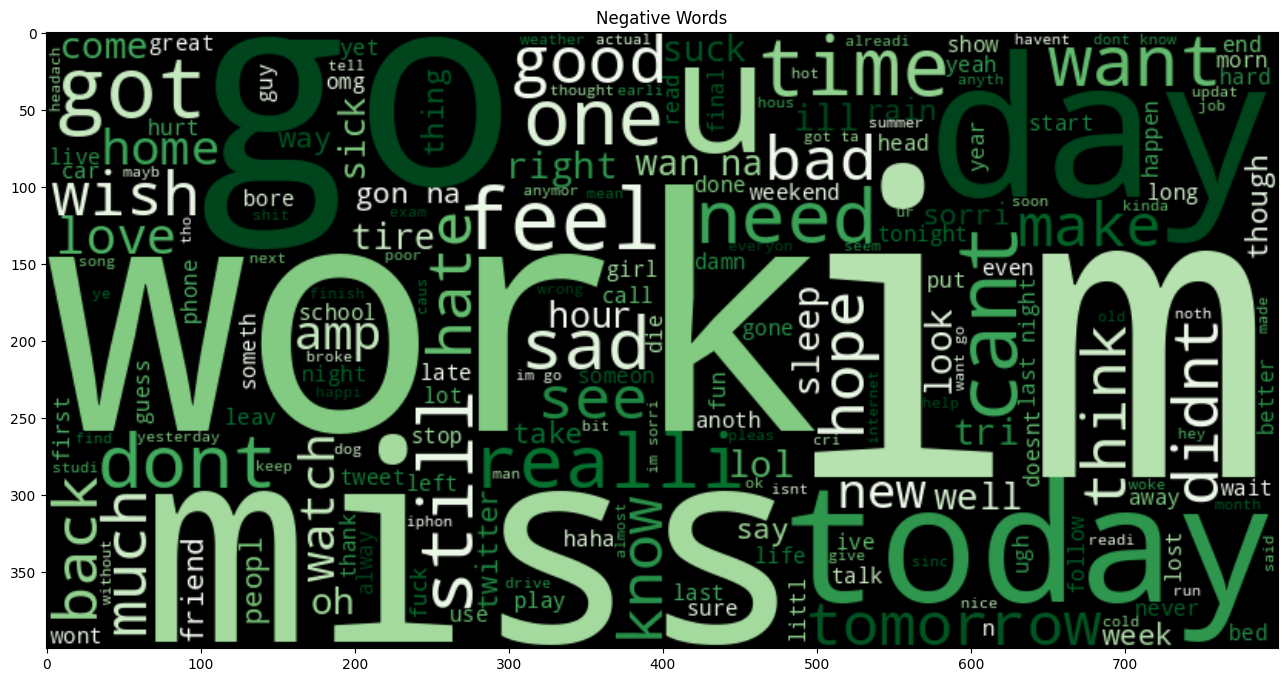

In [8]:
negative_text = ' '.join(df.loc[df['sentiment'] == 'Negative', 'text'])
wc = WordCloud(width=800, height=400, background_color='black', colormap='Greens')

neg = wc.generate(negative_text)

plt.figure(figsize=(16,8))
plt.imshow(neg, interpolation='bilinear')
plt.title("Negative Words")

plt.show()


**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.1, random_state=42)
print("Training Set Size:",X_train.size)
print("Test Set Size:",X_test.size)

Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [32]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
vocab_size = len(word_index)

print("Vocabulary Size :", vocab_size)


Vocabulary Size : 11960


**Now transform the training and testing word sequences.**

In [100]:
#ENTER YOUR CODE HERE


In [33]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
print(train_seq[0])
print(test_seq[0])

[26, 374, 4195, 701, 1079, 701, 16, 206, 6, 4196]
[312, 601, 1772, 2125, 108, 9]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [26]:
#ENTER YOUR CODE HERE

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 36
train_pad = pad_sequences(train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
test_pad = pad_sequences(test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
print("Training data:")
print(train_pad[0])
print("Testing data:")
print(test_pad[0])

Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   26  374
 4195  701 1079  701   16  206    6 4196]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  312  601 1772 2125  108    9]


**Label encode y.**

In [28]:
#ENTER YOUR CODE HERE

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(y_train)
test_labels = label_encoder.fit_transform(y_test)
print("Training labels:\n",train_labels)
print("Testing labels:\n",test_labels)

Training labels:
 [0 0 0 ... 1 0 1]
Testing labels:
 [1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [30]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip --no-check-certificate
!unzip glove.6B.zip

--2025-06-16 16:19:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-16 16:19:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-16 16:19:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [37]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size+1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size+1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [38]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, kernel_size=3, activation='relu')(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 36, 300)        │     3,588,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 36, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 34, 64)         │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,041,229 (15.42 MB)

 Trainable params: 452,929 (1.73 MB)

 Non-trainable params: 3,588,300 (13.69 MB)

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

In [40]:
history = model.fit(train_pad,train_labels, batch_size=1024, epochs=10,  validation_data=(test_pad, test_labels))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 986ms/step - accuracy: 0.5256 - loss: 0.6910 - val_accuracy: 0.6130 - val_loss: 0.6676
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 661ms/step - accuracy: 0.6333 - loss: 0.6500 - val_accuracy: 0.6550 - val_loss: 0.6208
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 768ms/step - accuracy: 0.6799 - loss: 0.6011 - val_accuracy: 0.6640 - val_loss: 0.5991
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 773ms/step - accuracy: 0.6960 - loss: 0.5803 - val_accuracy: 0.6640 - val_loss: 0.5839
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.7063 - loss: 0.5665 - val_accuracy: 0.6720 - val_loss: 0.5835
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 811ms/step - accuracy: 0.7238 - loss: 0.5434 - val_accuracy: 0.6800 - val_loss: 0.5721
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7343 - loss: 0.5315 - val_accuracy: 0.6830 - val_loss: 0.5758
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 921ms/step - accuracy: 0.7447 - loss: 0.5152 - val_accuracy: 0.6810 - val_los

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

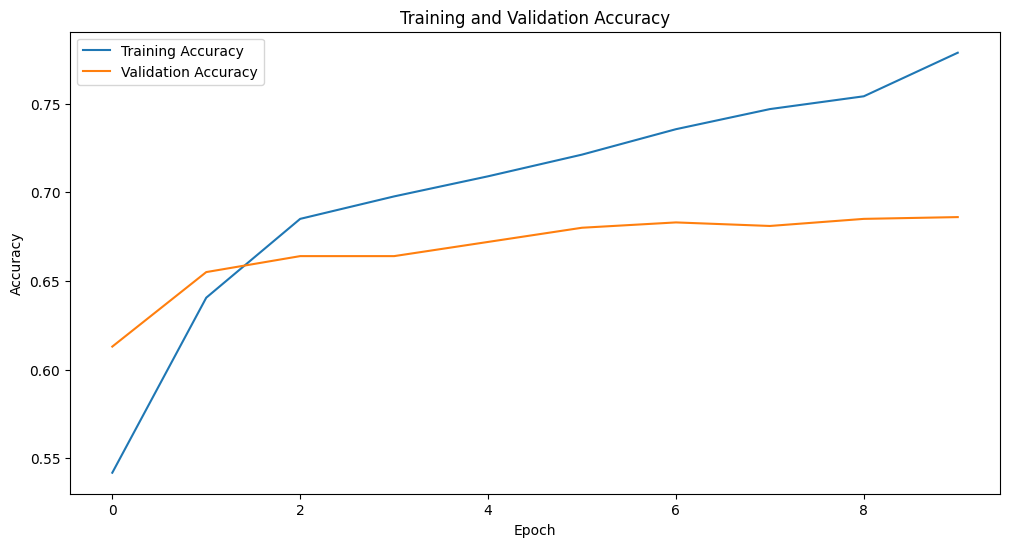

In [41]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

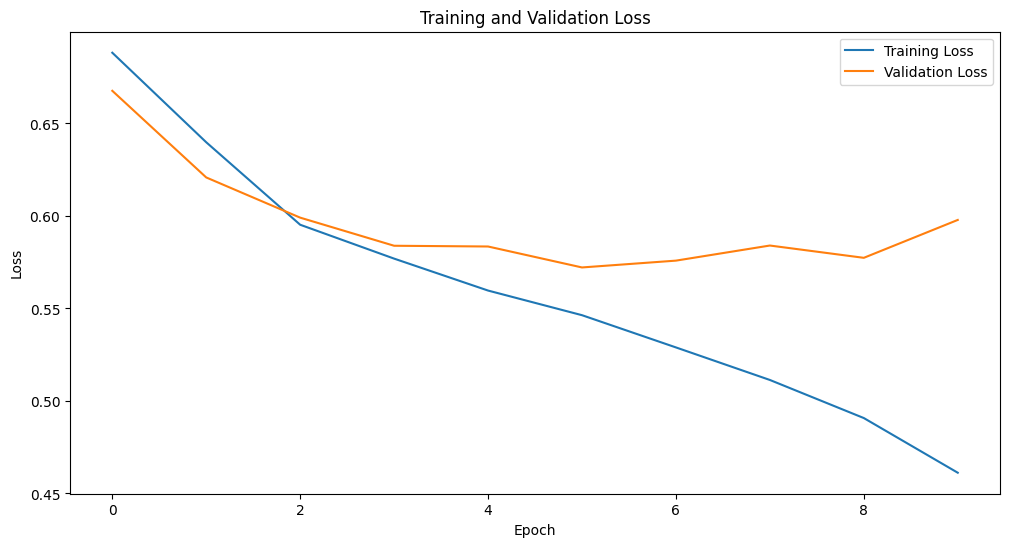

In [42]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [43]:
from sklearn.metrics import classification_report


test_labels_pred_prob = model.predict(test_pad)
test_labels_pred = (test_labels_pred_prob > 0.5).astype(int).flatten()
print(classification_report(test_labels, test_labels_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       492
           1       0.71      0.65      0.68       508

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [66]:
import random
r = random.randint(0, len(test_pad))
print("The chosen sequence is :",np.array(test_pad[r]))
prediction = model.predict(np.array([test_pad[r]]))
print("The predicted sentiment is :","Negative" if prediction[0][0]<0.5 else "Positive")
print("The original sentiment is:","Negative" if test_labels[r]<0.5 else "Positive")


The chosen sequence is : [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1 10839   286   310     1    55     1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted sentiment is : Positive
The original sentiment is: Positive


In [85]:
#ENTER YOUR CODE HERE


In [84]:
decode = []
reverse_word_index = {v: k for k, v in word_index.items()}
decode = [reverse_word_index.get(x) for x in test_pad[r] if x != 0 and x!=1]
print(decode)

['glori', 'god', 'write', 'friend']


**We can try this on a random string as well.**

In [87]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

In [111]:
a = remove_stopwords(input_str)
b = clean_text(a)
c= stem_text(b)
d = tokenizer.texts_to_sequences([c])
e = pad_sequences(d, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
print("After removal of stopwords:",a)
print("After removal of punctuation:",b)
print("After stemming:",c)
print("After tokenization",d)
print("After paddign",e)
prediction = model.predict(np.array(np.array(e)))
print("The predicted sentiment is :","Negative" if prediction[0][0]<0.5 else "Positive")

After removal of stopwords: hate everyone earth !
After removal of punctuation: hate everyone earth 
After stemming: hate everyon earth
After tokenization [[75, 113, 2293]]
After paddign [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   75  113 2293]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The predicted sentiment is : Negative


## GOOD JOB!